### **Decision Tree Classificaton**

In [59]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [60]:
df = sns.load_dataset("titanic")

In [61]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [62]:
X = df[["pclass", "sex", "age", "sibsp", "parch", "fare"]]
y = df["survived"]

In [63]:
X = pd.get_dummies(X, columns=["sex"])

In [64]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [65]:
X.age.fillna(value = X['age'].mean(), inplace=True)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [67]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred = model.predict(X_test)

In [69]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7150837988826816


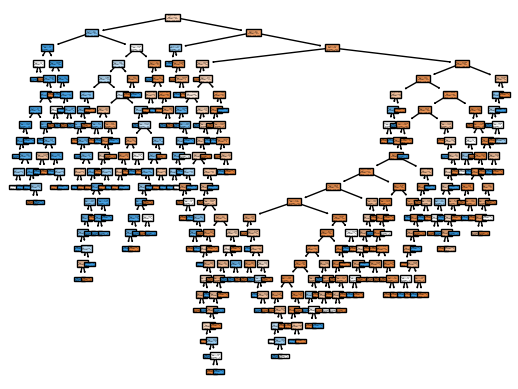

<Figure size 640x480 with 0 Axes>

In [70]:
tree.plot_tree(model.fit(X, y), filled = True)
plt.show()
plt.savefig("tree.png")

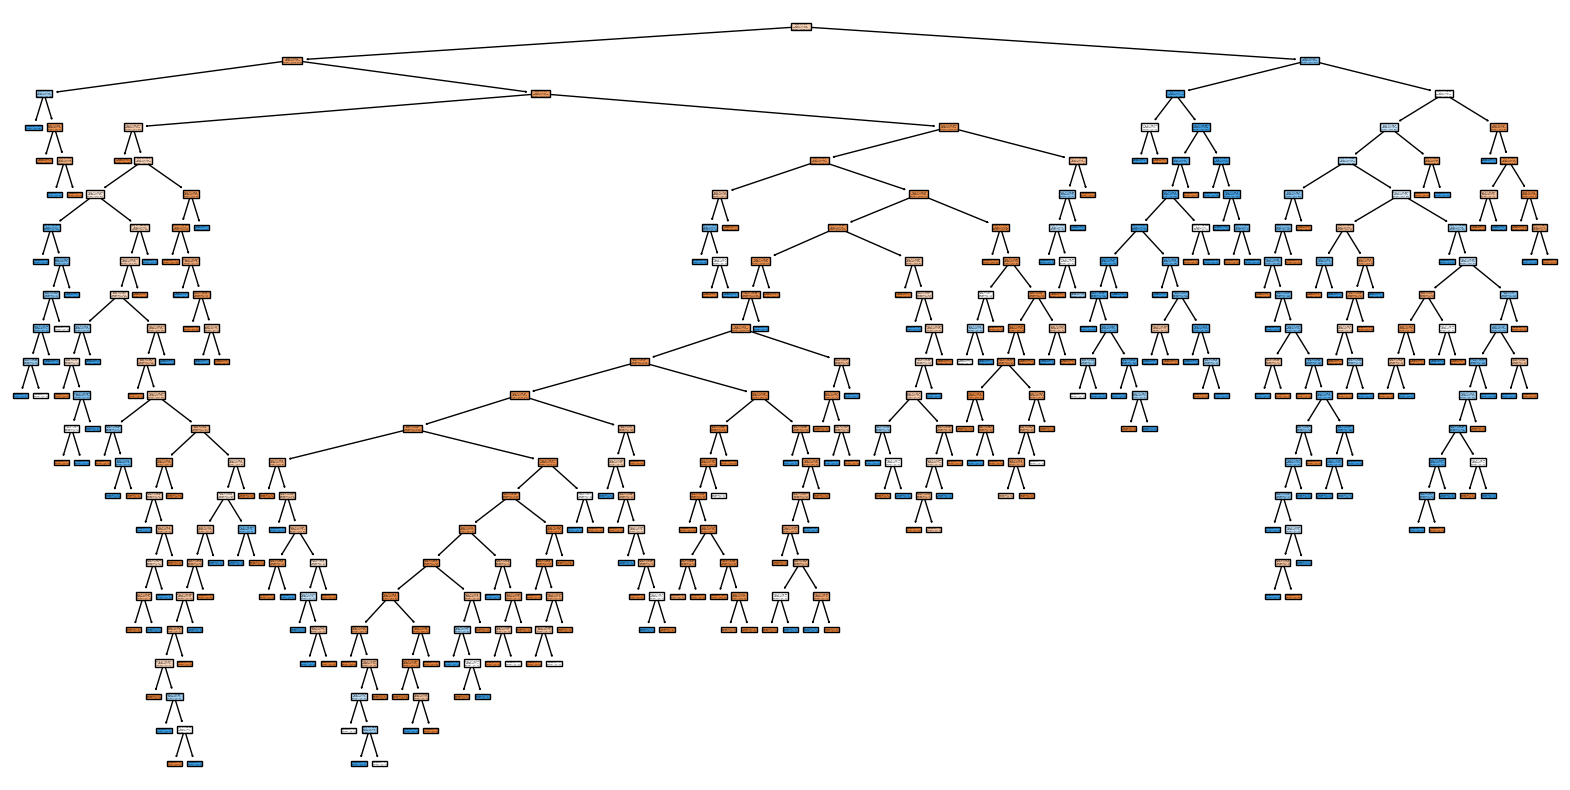

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure(figsize = (20,10))
tree.plot_tree(model.fit(X, y), filled = True)
plt.show()
plt.savefig("decission_tree.pdf", format = "pdf", dpi = 300)

In [72]:
# precision
from sklearn.metrics import precision_score, recall_score, f1_score

#### **Precision : Precision measure the proportion of true positive predictions among all positive predictions.**

In [73]:
precision_score(y_test, y_pred)


0.6578947368421053

#### **Rcall : Recall measures the proportion of true positive predictions among all actual positive instances.**

In [74]:
recall_score(y_test, y_pred)

0.6666666666666666

In [75]:
f1_score(y_test, y_pred)

0.6622516556291391

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[78, 26],
       [25, 50]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

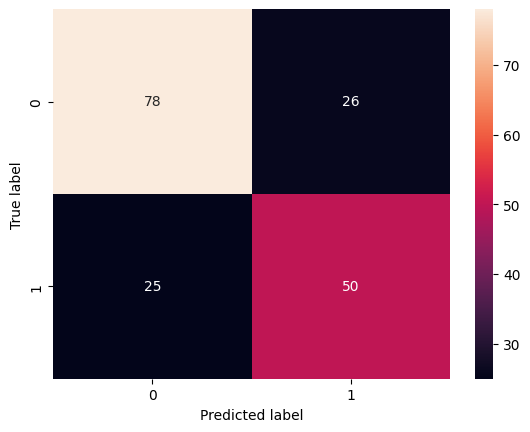

In [77]:
sns.heatmap(cm, annot = True)
plt.ylabel("True label")
plt.xlabel("Predicted label")

#### K Nearest Neighbours (KNN)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[85, 19],
       [29, 46]], dtype=int64)

In [79]:
precision_score(y_test, y_pred)

0.7076923076923077

In [80]:
recall_score(y_test, y_pred)

0.6133333333333333

Text(0.5, 23.52222222222222, 'Predicted label')

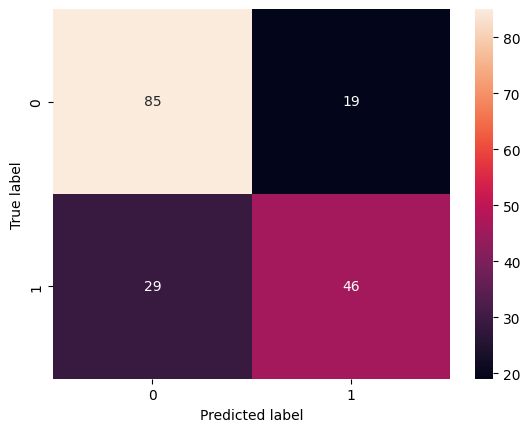

In [81]:
sns.heatmap(cm, annot = True)
plt.ylabel("True label")
plt.xlabel("Predicted label")

#### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Confusion Matrix:  [[86 18]
 [17 58]]
Precision Score:  0.7631578947368421
Recall Score:  0.7733333333333333
F1 Score:  0.7682119205298014


#### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Confusion Matrix:  [[83 21]
 [20 55]]
Precision Score:  0.7236842105263158
Recall Score:  0.7333333333333333
F1 Score:  0.7284768211920529


c:\Users\Optimus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### SVM

In [84]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Confusion Matrix:  [[99  5]
 [52 23]]
Precision Score:  0.8214285714285714
Recall Score:  0.30666666666666664
F1 Score:  0.44660194174757273


#### NAIVE Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Confusion Matrix:  [[87 17]
 [21 54]]
Precision Score:  0.7605633802816901
Recall Score:  0.72
F1 Score:  0.7397260273972602


In [87]:
# import libraries and model
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# define the models to be evaluated
models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), SVC()]
names = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']

# perform k-fold cross-validation for each model
k = 10
models_scores = []
for name, model in zip(names, models):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k)
    print(f"{name} CV accuracy: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}")

c:\Users\Optimus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Optimus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Logistic Regression CV accuracy: 0.801 +/- 0.057
Random Forest CV accuracy: 0.815 +/- 0.032
KNN CV accuracy: 0.723 +/- 0.051
SVM CV accuracy: 0.667 +/- 0.027


In [90]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ["linear", "rbf"],
              "gamma": [0.1, 1, 10]}

# Object grid search cv (Creating the model)
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Traing the model
grid_search.fit(X_train, y_train)

print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.79
